In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Modeling Exercises

In [4]:
df = pd.read_csv('saas.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
Month_Invoiced       790458 non-null object
Customer_Id          790458 non-null int64
Invoice_Id           790458 non-null int64
Subscription_Type    790458 non-null float64
Amount               790458 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [10]:
df.head(2)

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0


In [18]:
df['Month_Invoiced'] = pd.to_datetime(df['Month_Invoiced'])

In [22]:
# df.set_index('Month_Invoiced', inplace = True)

In [23]:
df.head(2)

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0


### 1 Split data (train/test) and resample by any period, except daily, and aggregate using the sum.

In [24]:
print(df.index.min())
print(df.index.max())

2014-01-31 00:00:00
2017-12-31 00:00:00


In [27]:
train = df[:'2016']
test = df['2017':]
train.shape, test.shape, train.index.min(), train.index.max(), test.index.min(), test.index.max()

((618169, 4),
 (172289, 4),
 Timestamp('2014-01-31 00:00:00'),
 Timestamp('2016-12-31 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-12-31 00:00:00'))

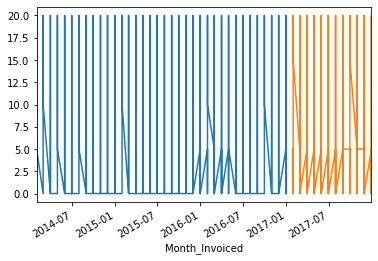

In [29]:
train.Amount.plot()
test.Amount.plot()

In [36]:
# it looks like people are being billed monthly
train_by_week = train['Amount'].resample('W').sum()
train_by_week.head(4)

Month_Invoiced
2014-02-02    35850.0
2014-02-09        0.0
2014-02-16        0.0
2014-02-23        0.0
Freq: W-SUN, Name: Amount, dtype: float64

In [37]:
# checked to see if people were being billed every 4 weeks... nope
train_by_week = train['Amount'].resample('4W').sum()
train_by_week.head(4)

Month_Invoiced
2014-02-02    35850.0
2014-03-02    37190.0
2014-03-30        0.0
2014-04-27    38295.0
Freq: 4W-SUN, Name: Amount, dtype: float64

In [43]:
# looks like customers are being invoiced monthly
train_by_month = train['Amount'].resample('M').sum()
(train_by_week < 0).mean()

0.0

### Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:

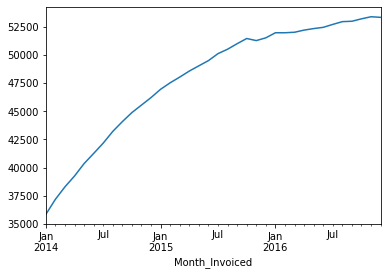

In [46]:
train_by_month.plot()

####  Simple Average

#### Moving Average

#### Holt's Linear Trend Model

### Based on previous year/month/etc., this is up to you.